# Social media data analytics (YouTube)

In [1]:
# For converting non_ASCII characters to ASCII character
!pip install unidecode

In [2]:
# To install latest google api python client
!pip install --upgrade google-api-python-client

In [1]:
# Importing necessary libraries
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import unidecode
from googleapiclient.discovery import build

In [ ]:
DEVELOPER_KEY = "YouTube API Key"
YOUTUBE_API_SERVICE_NAME = "youtube"
YOUTUBE_API_VERSION = "v3"

# Construct a Resource for interacting with an API.
youtube = build(YOUTUBE_API_SERVICE_NAME, YOUTUBE_API_VERSION, developerKey=DEVELOPER_KEY)
# Call the search.list method to retrieve results matching the specified query term.
# Setting the type as 'video' so that it search only for video. Not any playlist or channel
search_response = youtube.search().list(q="canada immigration", part="id,snippet", maxResults=50, type='videos').execute()
print(search_response)

{'kind': 'youtube#searchListResponse', 'etag': 'r5G_ev0dht-zqB56PqUJ3rWaOLc', 'nextPageToken': 'CDIQAA', 'regionCode': 'CA', 'pageInfo': {'totalResults': 1000000, 'resultsPerPage': 50}, 'items': [{'kind': 'youtube#searchResult', 'etag': 'qxgsqlJjpP0O5lYv4PQ6cDY17KM', 'id': {'kind': 'youtube#video', 'videoId': '5H01wTH4bgM'}, 'snippet': {'publishedAt': '2024-12-10T21:00:49Z', 'channelId': 'UCuFFtHWoLl5fauMMD5Ww2jA', 'title': 'Canadian politicians react to Trump calling Trudeau governor of Canada', 'description': "President-elect Donald Trump took a jab at Justin Trudeau in a social media post Tuesday, calling him 'Governor Justin Trudeau ...", 'thumbnails': {'default': {'url': 'https://i.ytimg.com/vi/5H01wTH4bgM/default.jpg', 'width': 120, 'height': 90}, 'medium': {'url': 'https://i.ytimg.com/vi/5H01wTH4bgM/mqdefault.jpg', 'width': 320, 'height': 180}, 'high': {'url': 'https://i.ytimg.com/vi/5H01wTH4bgM/hqdefault.jpg', 'width': 480, 'height': 360}}, 'channelTitle': 'CBC News', 'liveBroa

In [7]:
# create a CSV output for video list
csvFile = open('immigrations_result.csv','w')
csvWriter = csv.writer(csvFile)
csvWriter.writerow(["title","description","videoId","uploadDate","viewCount","likeCount","commentCount"])

84

### Code for extracting relevant data from search_response and saving required information to the respective column of previously created CSV file.

In [ ]:
# Searching through the search_result and add required information to the respective column of previously created CSV file
for search_result in search_response.get("items", []):
    if search_result["id"]["kind"] == "youtube#video":
        title = search_result["snippet"]["title"]
        title = unidecode.unidecode(title)
        description = search_result["snippet"]["description"]
        description = unidecode.unidecode(description)
        uploadDate = search_result["snippet"]['publishedAt']
        videoId = search_result["id"]["videoId"]
        video_response = youtube.videos().list(id=videoId,part="statistics").execute()
        for video_result in video_response.get("items",[]):
            viewCount = video_result["statistics"]["viewCount"]
            if 'likeCount' not in video_result["statistics"]:
                likeCount = 0
            else:
                likeCount = video_result["statistics"]["likeCount"]
            if 'commentCount' not in video_result["statistics"]:
                commentCount = 0
            else:
                commentCount = video_result["statistics"]["commentCount"]

        csvWriter.writerow([title,description,videoId,uploadDate,viewCount,likeCount,commentCount])

csvFile.close()


### Loading the CSV file and performing some data cleaning steps before analyze and visualize

In [195]:
# Loading the CSV file into pandas dataframe
df = pd.read_csv('immigrations_result.csv')
df

,title,description,videoId,uploadDate,viewCount,likeCount,commentCount
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Canadian politicians react to Trump calling Tr...,President-elect Donald Trump took a jab at Jus...,5H01wTH4bgM,2024-12-10T21:00:49Z,191138.0,2362.0,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Backlog of critical documents grows as Canada ...,The ongoing Canada Post strike has left thousa...,d5GgCi58QpM,2024-12-11T03:03:05Z,14189.0,98.0,0.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
95,Nearly 13K international students applied for ...,More details regarding the Canadian government...,g1ZtBL1JdsM,2024-09-25T02:15:02Z,96530.0,876.0,1282.0
96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,Americans moving to Canada receive a not-so-wa...,That was the old Canada. The new Canada loves ...,VXHtKqZVzLA,2024-11-21T21:06:02Z,707754.0,15132.0,2674.0
98,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [196]:
# Removing the NaN values 
df = df.dropna(how='all').reset_index(drop=True)
df.head()

,title,description,videoId,uploadDate,viewCount,likeCount,commentCount
0,Canadian politicians react to Trump calling Tr...,President-elect Donald Trump took a jab at Jus...,5H01wTH4bgM,2024-12-10T21:00:49Z,191138.0,2362.0,0.0
1,Backlog of critical documents grows as Canada ...,The ongoing Canada Post strike has left thousa...,d5GgCi58QpM,2024-12-11T03:03:05Z,14189.0,98.0,0.0
2,Trump again teases Canadian takeover with 'gov...,U.S. president-elect Donald Trump again sugges...,qJJ0lwyKPyE,2024-12-11T03:02:01Z,17649.0,193.0,0.0
3,Canadian politicians react to Trump calling Tr...,President-elect Donald Trump took a jab at Jus...,5H01wTH4bgM,2024-12-10T21:00:49Z,192225.0,2372.0,0.0
4,Backlog of critical documents grows as Canada ...,The ongoing Canada Post strike has left thousa...,d5GgCi58QpM,2024-12-11T03:03:05Z,14204.0,99.0,0.0


In [197]:
# Checking for any non NaN values in remaining columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         50 non-null     object 
 1   description   50 non-null     object 
 2   videoId       50 non-null     object 
 3   uploadDate    50 non-null     object 
 4   viewCount     50 non-null     float64
 5   likeCount     50 non-null     float64
 6   commentCount  50 non-null     float64
dtypes: float64(3), object(4)
memory usage: 2.9+ KB


In [198]:
# Taking only date portion from uploadDate column
df['uploadDate'] = df['uploadDate'].str[:10]

In [199]:
# Convert the date to date format
df['uploadDate'] = pd.to_datetime(df['uploadDate'])

In [200]:
# Converting the last 3 columns (viewCount, likeCount and commentCount) from float to integer
df[['viewCount', 'likeCount', 'commentCount']] = df[['viewCount','likeCount', 'commentCount']].astype(int)

In [201]:
# Checking whether the converison is successful
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   title         50 non-null     object        
 1   description   50 non-null     object        
 2   videoId       50 non-null     object        
 3   uploadDate    50 non-null     datetime64[ns]
 4   viewCount     50 non-null     int64         
 5   likeCount     50 non-null     int64         
 6   commentCount  50 non-null     int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 2.9+ KB


In [202]:
# To delete any leading and trailing space
df['title'] = df.title.str.strip()

In [203]:
# Sorting the data by uploadDate and saving into a new variable named immigration
immigration = df.sort_values('uploadDate').reset_index(drop=True).copy()

# Checking the new dataframe 'immigration'
immigration.head(10)

,title,description,videoId,uploadDate,viewCount,likeCount,commentCount
0,Crossing US Canada Border without VISA or Pass...,Checkout Our Courses: https://singhinusa.com G...,eymVYQHGHRE,2023-07-30,1323303,43250,1819
1,"""Unhealthy"" to link housing crisis to asylum s...",After announcing that the Canadian government ...,GRyysEYOsFM,2024-02-29,20761,263,304
2,Nearly 40% of new immigrants thinking of movin...,Canada's high cost of housing has nearly 40 pe...,7hOyjWdJNgM,2024-07-04,161500,1187,1582
3,What is going on with immigration in Canada? H...,Canada has welcomed more than 3.9 million new ...,TdUg8_zAGg0,2024-07-16,6741,115,50
4,Why is anti-immigration sentiment on the rise ...,Canada has long been celebrated for its welcom...,txyjmNXcWiU,2024-08-06,2656569,41637,13206
5,Trudeau questioned about high immigrant unempl...,"At a cabinet retreat in Halifax, Prime Ministe...",irzywqnv3E8,2024-08-27,183869,1366,0
6,"Canada Announces Immigration Cuts, Affecting I...","Canada Announces Immigration Cuts, Affecting I...",Rah87wX8RRM,2024-08-28,381501,1809,2625
7,Le Canada reduit ses permis de travail et d&#3...,Apres avoir ouvert les vannes pour accueillir ...,wJv1j6_YTRE,2024-09-20,42827,328,93
8,Nearly 13K international students applied for ...,More details regarding the Canadian government...,g1ZtBL1JdsM,2024-09-25,96530,876,1282
9,LIVE: Trudeau broke Canada&#39;s immigration s...,Call a carbon tax election so common sense Con...,HIWOgQ-BZV8,2024-10-24,131807,6129,1563


In [204]:
# Checking the number of rows and columns
immigration.shape

(50, 7)

In [205]:
# The videoId column should contain unique values.We will check for any duplicated values in videoID column.
immigration[immigration.videoId.duplicated()]

,title,description,videoId,uploadDate,viewCount,likeCount,commentCount
41,Canadian politicians react to Trump calling Tr...,President-elect Donald Trump took a jab at Jus...,5H01wTH4bgM,2024-12-10,192225,2372,0
47,Trump again teases Canadian takeover with 'gov...,U.S. president-elect Donald Trump again sugges...,qJJ0lwyKPyE,2024-12-11,17649,193,0
48,Backlog of critical documents grows as Canada ...,The ongoing Canada Post strike has left thousa...,d5GgCi58QpM,2024-12-11,14189,98,0


**In our dataset we found that there are 3 duplicated records as per videoId column. We will delete those records.**

In [206]:
# Deleting duplicated records.
immigration = immigration.drop_duplicates(subset='videoId',keep='first').reset_index(drop=True).copy()

In [207]:
# Checking the shape (rows and columns) after deleting duplicated records
immigration.shape

(47, 7)

### Analyze and visualize the data

Date range of our videos

In [208]:

print(f'Our videos ranged from {immigration.uploadDate.min().strftime('%Y-%m-%d')} to {immigration.uploadDate.max().strftime('%Y-%m-%d')}.')

Our videos ranged from 2023-07-30 to 2024-12-11.


Various descriptive statistics of our numeric columns.

In [209]:
immigration[['viewCount','likeCount','commentCount']].describe().round(2)

,viewCount,likeCount,commentCount
count,47.00,47.00,47.00
mean,326582.60,6698.15,1741.62
std,847175.76,21216.54,5399.92
min,1002.00,0.00,0.00
25%,14948.00,119.00,7.50
50%,39868.00,279.00,130.00
75%,147594.00,1276.50,633.50
max,4994112.00,133892.00,30126.00


Seeing the relationship of columns

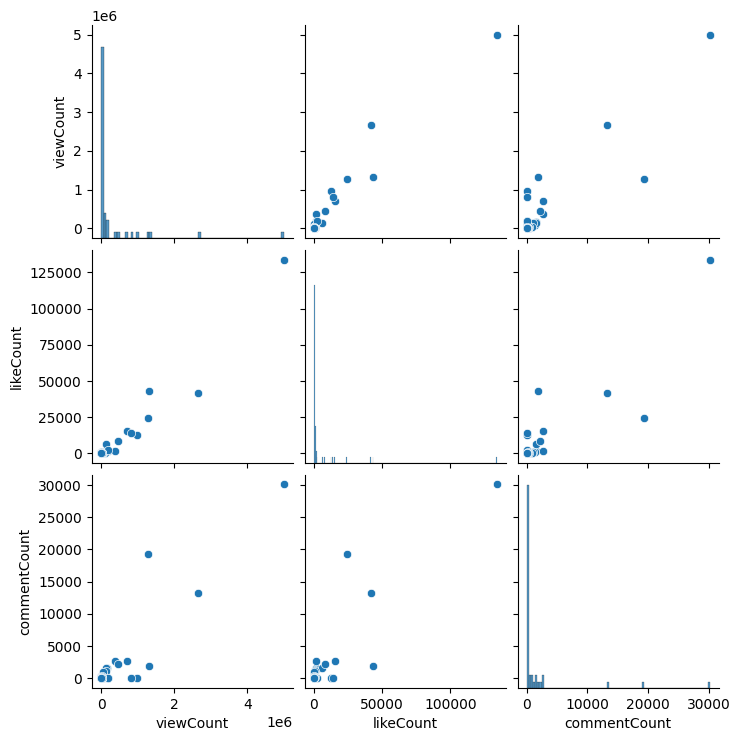

In [210]:
sns.pairplot(immigration)
plt.show()

From the plots above we can see there is strong positive relative bewteen viewCount and likeCount.We will now measure the correlation of those two columns.

In [211]:
immigration['viewCount'].corr(immigration['likeCount'])

np.float64(0.9740010280744381)

Text(0, 0.5, 'ViewCount (in million)')

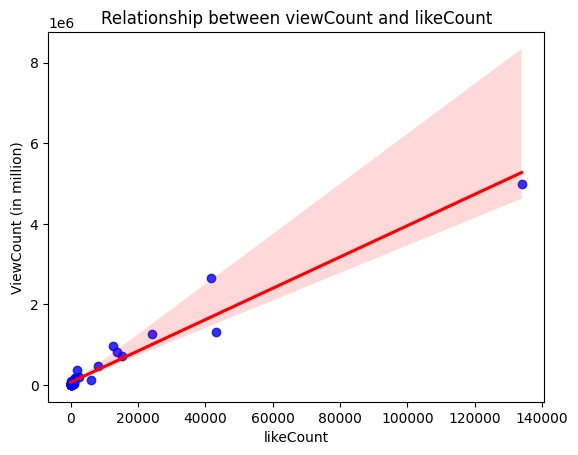

In [212]:
# Scatterplot with Regression Line
sns.regplot(x='likeCount', y='viewCount', data=immigration, color="blue", line_kws={"color": "red"})
plt.title('Relationship between viewCount and likeCount')
plt.ylabel("ViewCount (in million)")

**So from here we can see there are strong positive linear correlation between those 2 variables**

Now we will try to develop a linear model that will give us number of views based on the number of likes on a video.

In [213]:
#Importing necessary library

from sklearn import linear_model
%matplotlib inline

In [214]:
#Seperating variables for linear model

likeCount = pd.DataFrame(df['likeCount'])   #input/indepedent variable, 1d/2d/nd

viewCount = df.viewCount   # output/depent variable, 1d

# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(likeCount, viewCount)  #training a model (input (X), output(y)) format


LinearRegression()

In [215]:
reg.predict([[5]])   #try to predict viewcout using likecount 1000

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([64548.77784102])

**So from above we can say a video will get on an average 64548 views if it gets 5 likes**

In [216]:
coef = reg.coef_
coef

array([38.91864509])

So it implies, for every additionl like, there will be on an average increase of 39 views.

In [217]:
intercept = reg.intercept_
intercept

np.float64(64354.18461555772)

This implies that even if a video has no like, this will have 64354 views.

### Y = m * X + b (m is coefficient and b is intercept)

In [218]:
(coef*5) + intercept

array([64548.77784102])

ViewCount over the time.

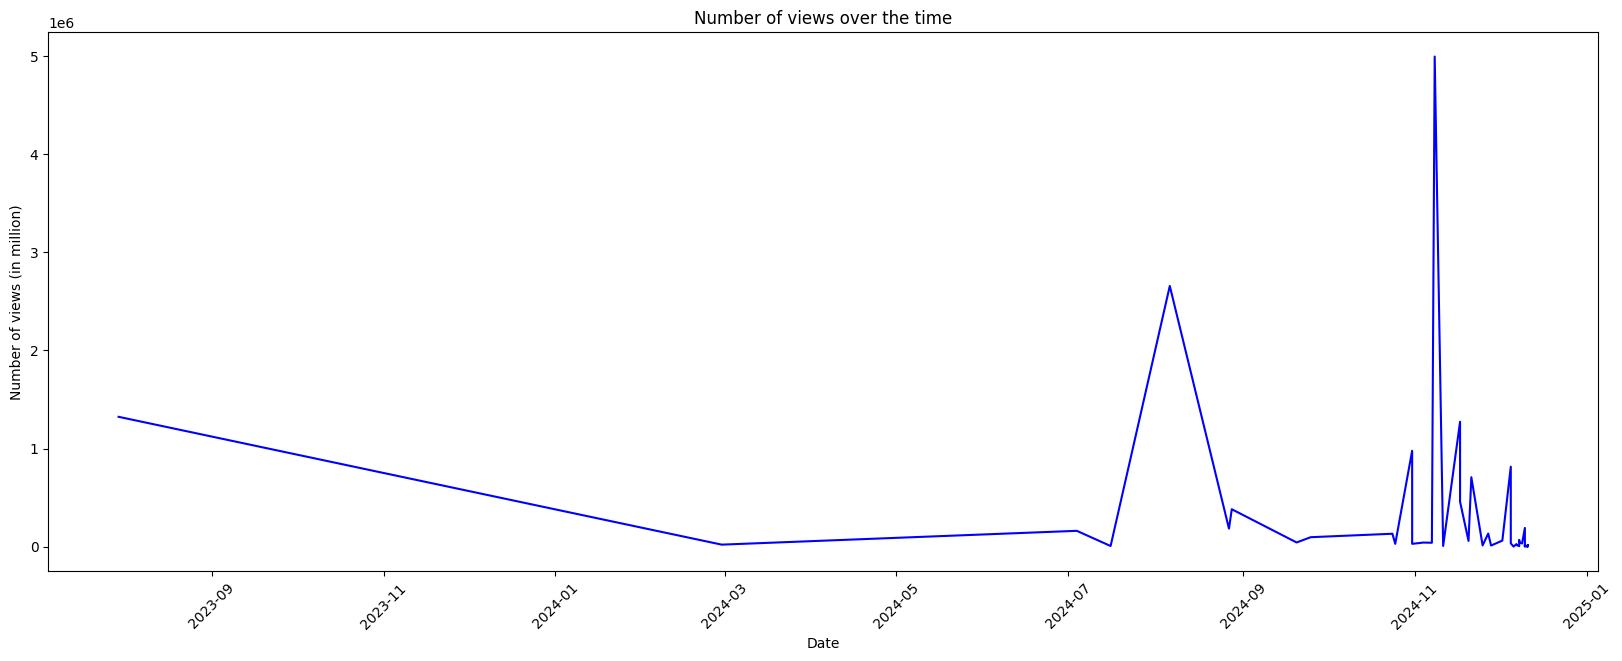

In [219]:
# We will see the trend of view over the time
plt.figure(figsize=(20,7))
plt.plot(immigration.uploadDate,immigration.viewCount,marker="", linestyle="-", color="blue")
plt.title("Number of views over the time")
plt.xlabel('Date')
plt.ylabel('Number of views (in million)')
plt.xticks(rotation=45)
plt.show()

From the line chart above, we can see a sudden rise and flactuation on view from July to end of the year. This might happen as there was US general election on November-2024 where Trump won. He announced that we will deport illegal immigrats from USA. There might be related impact of this on Canada immigration also. As they share a long border.

Also from July, Canada also taking a step to cut their immigration. This might influence interested people to watch 'Canada Immigration' related videos more.

N.B.: We have here informaiton of 47 number of videos only. Which is not sufficient to accurately protray the impact of those events.

Also we can see the same kind of trend in like count and comment count alos. Below are those 2 chart.

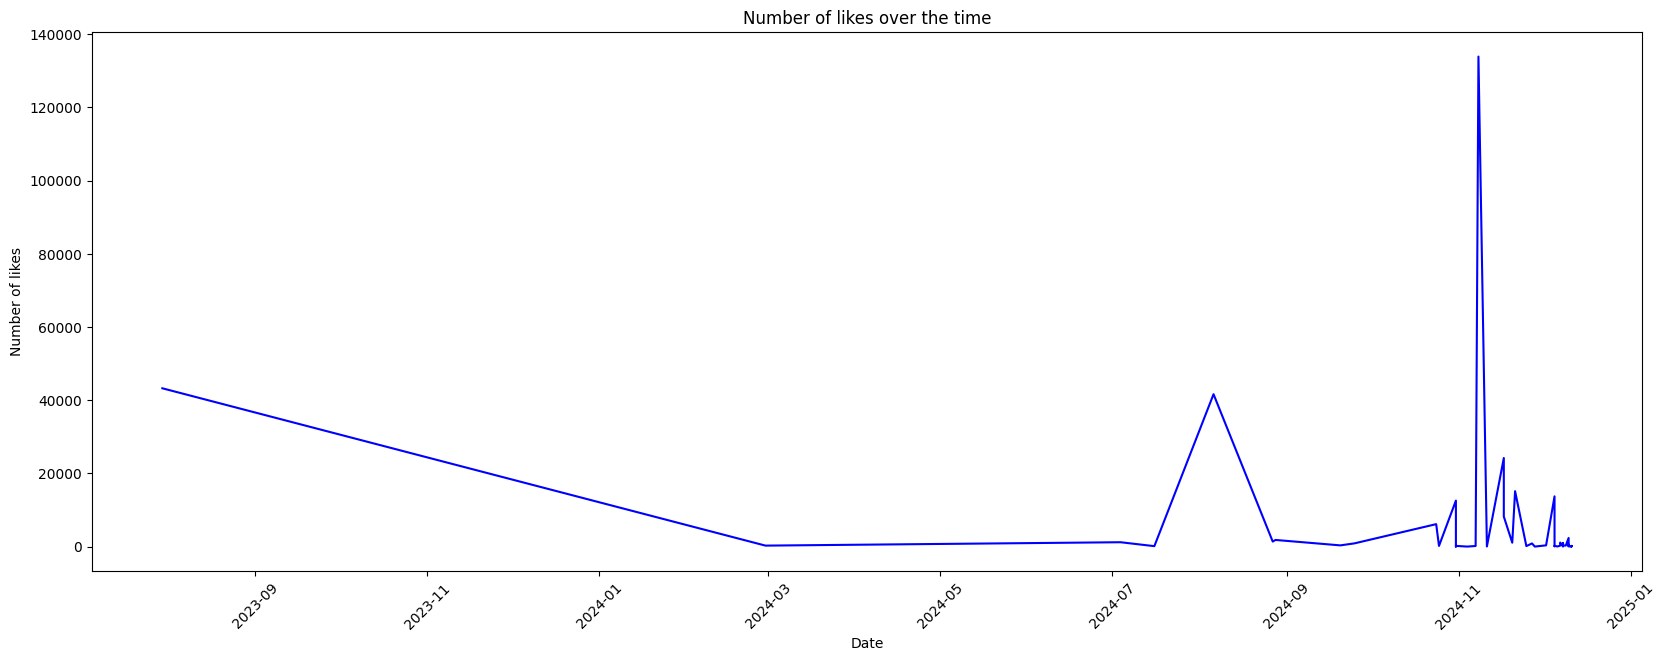

In [220]:
# We will see the trend of likes over the time
plt.figure(figsize=(20,7))
plt.plot(immigration.uploadDate,immigration.likeCount,marker="", linestyle="-", color="blue")
plt.title("Number of likes over the time")
plt.xlabel('Date')
plt.ylabel('Number of likes')
plt.xticks(rotation=45)
plt.show()

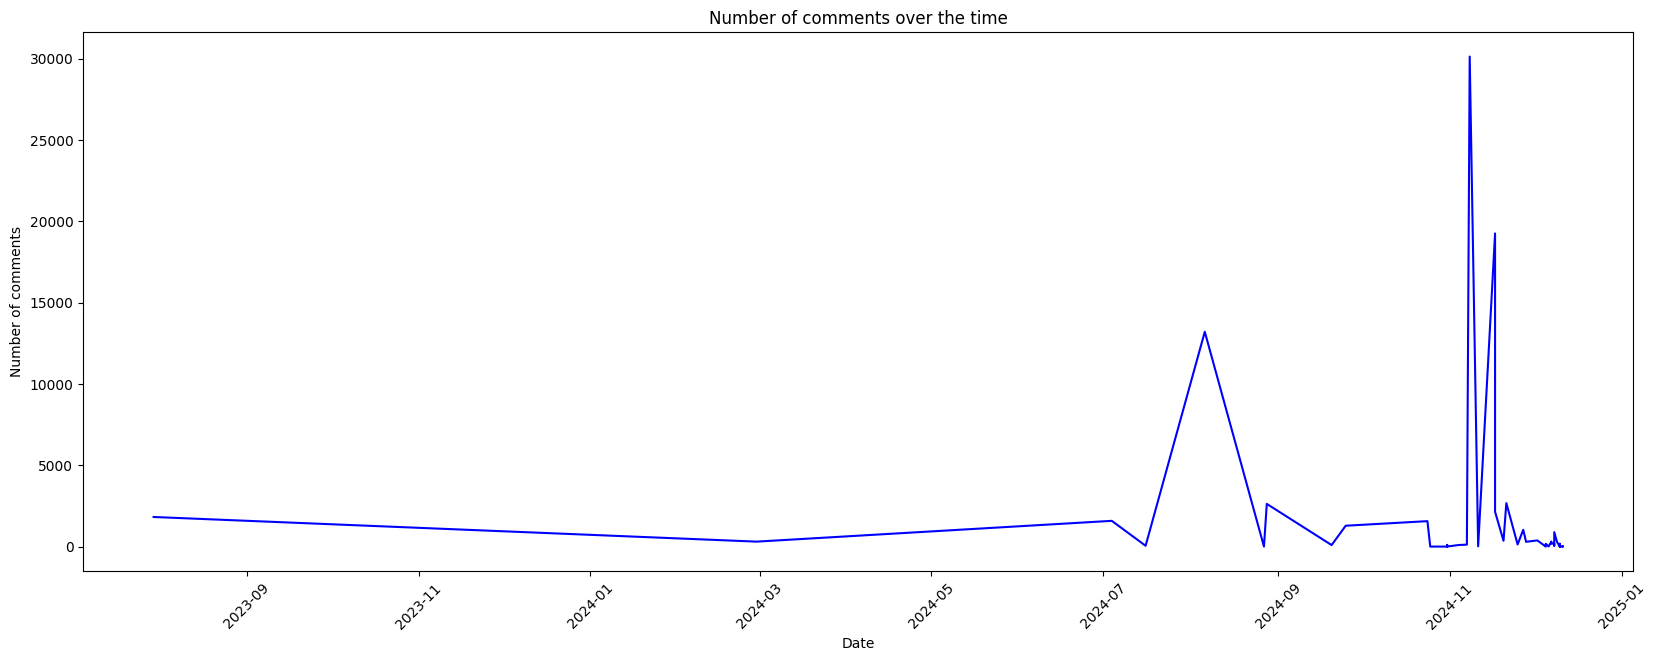

In [221]:
# We will see the trend of comments over the time
plt.figure(figsize=(20,7))
plt.plot(immigration.uploadDate,immigration.commentCount,marker="", linestyle="-", color="blue")
plt.title("Number of comments over the time")
plt.xlabel('Date')
plt.ylabel('Number of comments')
plt.xticks(rotation=45)
plt.show()

### Sentimental Analysis

In this section we will try to analyze sentiments of out video title. We will check both the subjectivity of the title and polarity of the title.

In [222]:
# installing necessary library
!pip install textblob

In [223]:
# Importing necessarey libraries
from textblob import TextBlob

In [224]:
# Custom function for sentiment
def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def get_polarity(text):
    return TextBlob(text).sentiment.polarity

In [225]:
immigration["Subjectivity"]= immigration['title'].apply(get_subjectivity).round(2)
immigration["Polarity"]= immigration['title'].apply(get_polarity).round(2)

In [226]:
immigration[['title','uploadDate','Subjectivity', 'Polarity']].head()

,title,uploadDate,Subjectivity,Polarity
0,Crossing US Canada Border without VISA or Pass...,2023-07-30,0.00,0.00
1,"""Unhealthy"" to link housing crisis to asylum s...",2024-02-29,0.70,-0.40
2,Nearly 40% of new immigrants thinking of movin...,2024-07-04,0.44,0.07
3,What is going on with immigration in Canada? H...,2024-07-16,0.00,0.00
4,Why is anti-immigration sentiment on the rise ...,2024-08-06,0.00,0.00


Fromt the histogram below we can see the distribution of the Sujectivity of the title

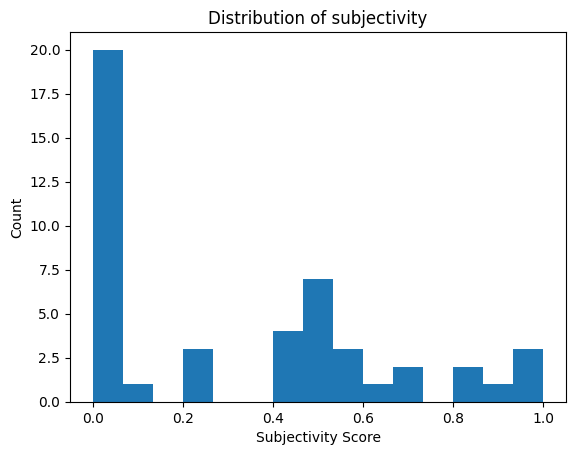

In [227]:
# Distribution of subjectivity of the title.
plt.hist(x=immigration.Subjectivity, bins=15)
plt.title('Distribution of subjectivity')
plt.xlabel('Subjectivity Score')
plt.ylabel('Count')
plt.show()

From the above chart we can see almost half of the titles are Objective (less then 0.3).

Now we will see the titles those are highly subjective (score equal of more that 0.8)

In [237]:
# Set pandas display option to show full content
pd.set_option('display.max_colwidth', None)

In [238]:
immigration.title[immigration.Subjectivity>=0.8]

11                              Why Canada's making massive cuts to immigration | About That
13                            Quebec pauses key immigration programs for permanent residents
16                                                Why living in Canada has become Impossible
21    Americans moving to Canada receive a not-so-warm welcome... | This Hour Has 22 Minutes
31        Canada's SHOCKING 2025 Immigrant DEPORTATION Plan [It&#39;s WORSE Than You Think!]
45                        Backlog of critical documents grows as Canada Post strike drags on
Name: title, dtype: object

We will now check the distribution of Polarity of the titles

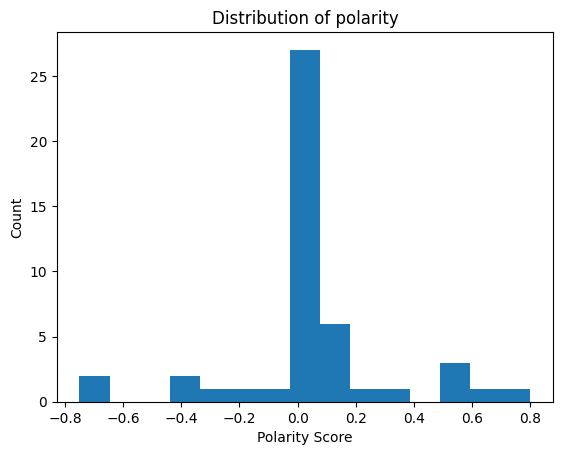

In [229]:
# Distribution of polarity of the title.
plt.hist(x=immigration.Polarity, bins=15)
plt.title('Distribution of polarity')
plt.xlabel('Polarity Score')
plt.ylabel('Count')
plt.show()

From here we can see more that half of the video titles are in Neutral category (near 0)

Now we will catrgorize the videos based of the polarity.

In [231]:
#Polarity coading
def get_analysis(x):
    if x < -0.2:
        return 'Negative'
    elif 0.2>= x >= -0.2:
        return 'Neutral'
    else:
        return 'Positive'

In [232]:
immigration['Analysis'] = immigration['Polarity'].apply(get_analysis)

Here are the negative titles

In [239]:
immigration.title[immigration.Analysis=='Negative']

1                 "Unhealthy" to link housing crisis to asylum seekers, Canada's immigration minister says
16                                                              Why living in Canada has become Impossible
17    Behind Canada&#39;s Move To End Fast-Track Student Visas, 10-Year Tourist Visas To Check Immigration
25         Sharp Rise In Indians Illegally Crossing Into US Via Canada Border | WION Dispatch | World News
31                      Canada's SHOCKING 2025 Immigrant DEPORTATION Plan [It&#39;s WORSE Than You Think!]
Name: title, dtype: object

Here are the positive titles

In [240]:
immigration.title[immigration.Analysis=='Positive']

20           Why Canada is Closing Its Doors to Many Immigrants - The Truth You Need to Know
21    Americans moving to Canada receive a not-so-warm welcome... | This Hour Has 22 Minutes
22                                 A look at the cost of supporting asylum seekers in Canada
26                                    Is Trump right about the Canadian border? | About That
38                       Top Canada News in Punjabi | December 10, 2024 | Immigration | Visa
42                                         2025 Canada PR Pathways: Faster, Smarter, Better!
46                       Top Canada News in Punjabi | December 11, 2024 | Immigration | Visa
Name: title, dtype: object

Now we want to see whether there is any video watching preference based on negativity or positivity

In [256]:
# Calculate the mean view based on the grouping by polarity
mean_Analysis= immigration[['viewCount','Analysis']].groupby('Analysis').mean(numeric_only=True).round(2)
mean_Analysis

,viewCount
Analysis,
Negative,1020358.40
Neutral,246343.91
Positive,232221.86


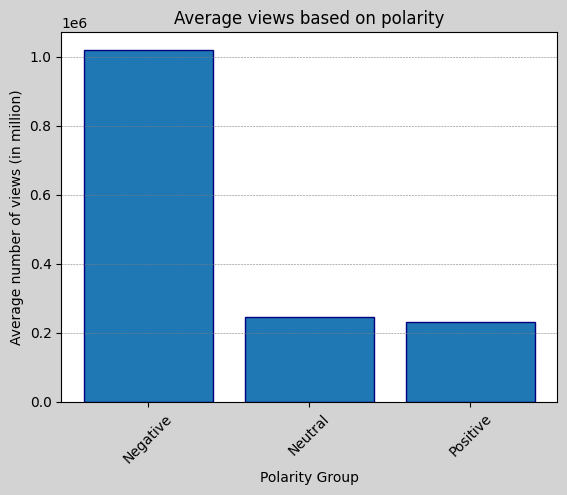

In [262]:
#Showing the result throguh bar plot

# Choosing a background color
plt.figure(facecolor='#D3D3D3')

# Draw the chart
plt.bar(x=mean_Analysis.index,height=mean_Analysis.viewCount, edgecolor="navy")

# Setting lables & title
plt.xlabel("Polarity Group")
plt.ylabel("Average number of views (in million)")
plt.title("Average views based on polarity")

# Rotating X labels
plt.xticks(rotation=45)

# Drawing grid in chart
plt.grid(True, axis='y', linewidth=0.4, linestyle='--', color='gray')

# Showing the chart
plt.show()


**So from the above chart we can clearly see that negative videos 5 times higher average views then neutral and positive videos. Also Positive videos has sightly lower average views than Neutral video.**

**So we can say people tend to watch Negative videos more and positive videos less.**

## Summary

- Canada immigration has got more attention from July 2024 to onward due to Canada's policy to cut down immigraiton. Also US election on November 2024 has an impact on topic of Canada Immigraiton.

- People tend to watch Negative videos more and positive videos less